In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

[ 8.        +0.00000000e+00j  0.57294902+2.04087031e+00j
  1.45491503-4.75528258e+00j  3.92705098-5.20431056e+00j
  7.04508497-2.93892626e+00j -4.        -1.95943488e-15j
  7.04508497+2.93892626e+00j  3.92705098+5.20431056e+00j
  1.45491503+4.75528258e+00j  0.57294902-2.04087031e+00j]


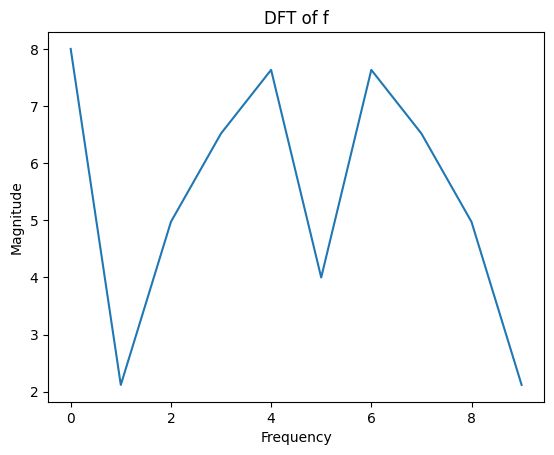

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_matrix(N):
    """Return the Fourier matrix of size N x N."""
    F = np.zeros((N, N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            F[i, j] = np.exp(-2j * np.pi * i * j / N)
    return F

f = np.array([3, 2, -1, 1, -1, 2, 0, 3, 1, -2]).T

# Compute the DFT of f
f_hat = fourier_matrix(10) @ f
print(f_hat)

plt.plot(np.abs(f_hat))
plt.ylabel('Magnitude')
plt.xlabel('Frequency')
plt.title('DFT of f')
plt.show()

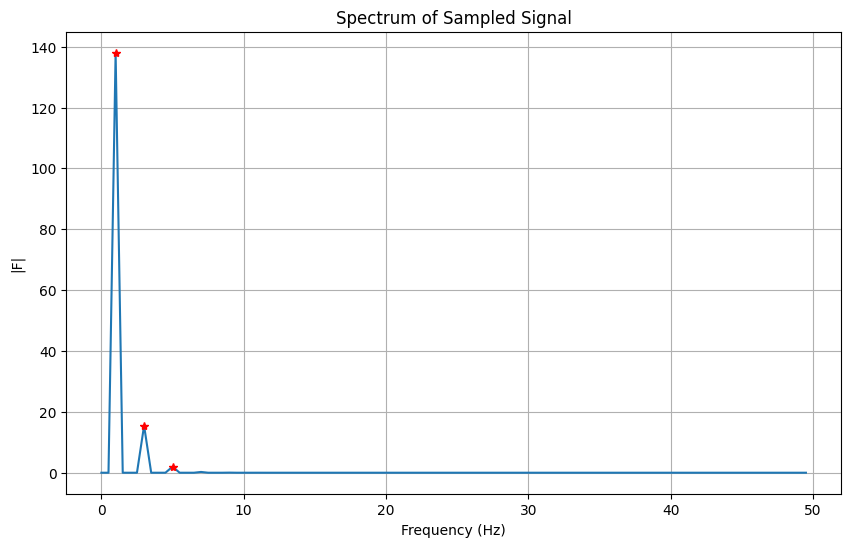

[1. 3. 5.] [138.00431566  15.46028985   1.98225956]


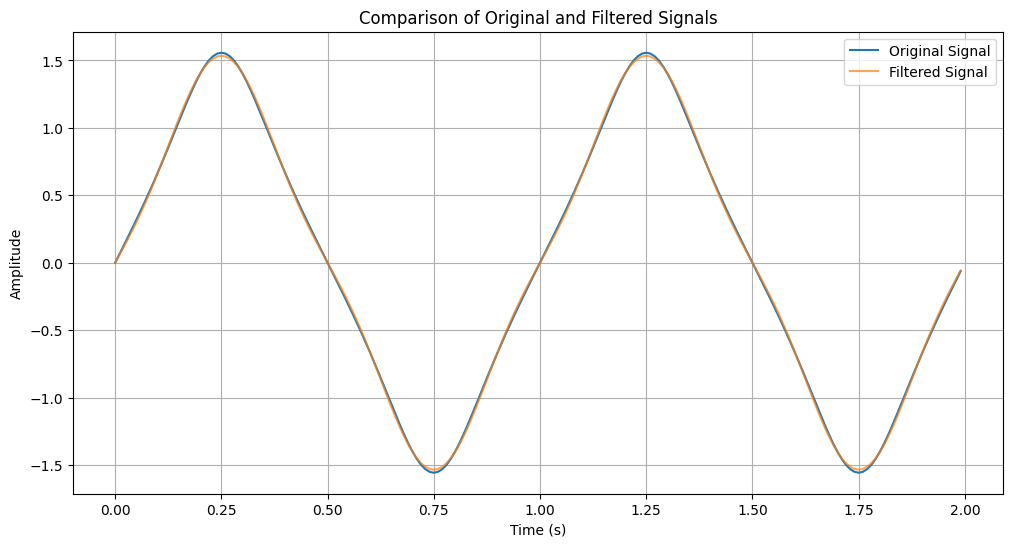

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_frequency = 100  # in Hz
delta_t = 1 / sampling_frequency  # time step in seconds
t = np.arange(0, 2, delta_t)  # time array from 0 to 2 seconds

# Function f(t)
f_t = np.tan(np.sin(2 * np.pi * t))

# Computing the Discrete Fourier Transform (DFT)
F = np.fft.fft(f_t)
N = len(F)  # Total number of samples
frequencies = np.fft.fftfreq(N, delta_t)  # Frequency bins

# Preparing the data for the spectrum plot
n = np.arange(N // 2)  # n values for the first half of the spectrum
magnitude = np.abs(F)[:N // 2]  # Magnitude of the DFT for the first half

# Plotting the Spectrum
plt.figure(figsize=(10, 6))
plt.plot(n / (N * delta_t), magnitude)
plt.title("Spectrum of Sampled Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|F|")
plt.grid(True)

peaks, _ = find_peaks(magnitude, height=1)

peak_frequencies = frequencies[peaks]

plt.plot(peak_frequencies, magnitude[peaks], 'r*')

plt.show()
print(peak_frequencies, magnitude[peaks])


power_density_threshold = 0.05

F_filtered = np.where(np.abs(F) / N >= power_density_threshold, F, 0)

f_filtered = np.fft.ifft(F_filtered).real
plt.figure(figsize=(12, 6))
plt.plot(t, f_t, label="Original Signal")
plt.plot(t, f_filtered, label="Filtered Signal", alpha=0.7)
plt.title("Comparison of Original and Filtered Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
